<a href="https://colab.research.google.com/github/CoronelChefe/Analise-Exploratoria-Ig-para-COVID-19/blob/main/An%C3%A1lise_Explorat%C3%B3ria_Jaum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Pesquisa exploratória dos dados sobre os profissionais de saúde da Paraíba**
---------------------------------------------------------


TODO:
---------------------------------------------------------
-> Avaliação dos anticorpos
---------------------------------------------------------
-> correlaçao por faixa etária
---------------------------------------------------------
-> Medidas de centralidade
---------------------------------------------------------
........................................................................................................................................................................................................................................                                                                                                 ........................................................................................................................................................................................................................................                                                                                                 ........................................................................................................................................................................................................................................                                                                                                                                  

***Setando***
_____________________________________________________________

In [1]:
#pip install --upgrade mplfinance


Importando bibliotecas

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import mplfinance as fplt

Leitura do arquivo

In [3]:
dataframe = pd.read_excel("/content/Relatorio IgG quantitativo ATUALIZADO.xlsx")
#dataframe

Contando por sexo

In [4]:
#REMOVIDO OS PACIENTES
#dataframe2['sexo'].value_counts()
#MANTENDO PACIENTES
dataframe['SEXO'].value_counts()

FEMININO     110
MASCULINO     32
Name: SEXO, dtype: int64

Análise do DATAFRAME

In [5]:
dataframe.head()

,NOME,IDADE,SEXO,DT. COLETA,RESULTADO,LEITURA,PROFISSIONAL DE SAÚDE / PACIENTE
0,ADRIANA DO NASCIMENTO,47.0,FEMININO,2021-04-13,REAGENTE,463.6,PROFISSIONAL DE SAÚDE
1,DANIELLE DI CAVALCANTI SOUSA,40.0,FEMININO,2021-04-13,REAGENTE,1129.9,PROFISSIONAL DE SAÚDE
2,KATIA CRISTINA LOURENCO BEZERRA,66.0,FEMININO,2021-04-13,REAGENTE,954.5,PROFISSIONAL DE SAÚDE
3,IVETE MARIA DE SOUZA,58.0,FEMININO,2021-05-31,REAGENTE,462.1,PROFISSIONAL DE SAÚDE
4,MYRIAN AZOUBEL SALES,54.0,FEMININO,2021-04-14,REAGENTE,5850.9,PROFISSIONAL DE SAÚDE


In [6]:
print(dataframe.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142 entries, 0 to 141
Data columns (total 7 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   NOME                              142 non-null    object        
 1   IDADE                             142 non-null    float64       
 2   SEXO                              142 non-null    object        
 3   DT. COLETA                        142 non-null    datetime64[ns]
 4   RESULTADO                         142 non-null    object        
 5   LEITURA                           142 non-null    float64       
 6   PROFISSIONAL DE SAÚDE / PACIENTE  142 non-null    object        
dtypes: datetime64[ns](1), float64(2), object(4)
memory usage: 7.9+ KB
None


In [7]:
print(dataframe.tail(14))

                                        NOME  IDADE       SEXO DT. COLETA  \
128             ARYANE NATALIE DE LIMA SILVA   22.0   FEMININO 2021-05-25   
129            ANTONELLA FELICIANO DE ARAUJO    0.0   FEMININO 2021-05-06   
130         MARIA DE LOURDES SOARES DA SILVA   62.0   FEMININO 2021-05-03   
131         MATHEUS VINICIUS SANTOS DA SILVA    5.0  MASCULINO 2021-05-28   
132  MARIA DO SOCORRO DE MENDONCA CAVALCANTI   60.0   FEMININO 2021-05-28   
133           MARIA ILEANA BERNARDES LACERDA   62.0   FEMININO 2021-05-26   
134                     RENE ALBINO DA SILVA   23.0  MASCULINO 2021-05-26   
135                      MARIA LOPES FREITAS   56.0   FEMININO 2021-05-26   
136         LYLIAN CRISTINY BARBOSA DA SILVA   35.0   FEMININO 2021-05-01   
137              IRACEMA MENDES CAMPOS SILVA   56.0   FEMININO 2021-05-10   
138               ANDREA BARROS DE MAGALHAES   49.0   FEMININO 2021-05-27   
139             CLAUDIA SIMONE FERRAZ VIEIRA   49.0   FEMININO 2021-05-18   

***Tratamento do DATAFRAME***
_____________________________________________________________

Renomeando as colunas para que seja possível utilizar o método `.query()` do Pandas para realizar a filtragem dos dados, pois alguns caracteres presentes na língua portuguesa não são suportados pelo método `.query()`.

In [8]:
dataframe2 = dataframe.rename(columns={"IDADE":"idade", "SEXO":"sexo",
          "DT.COLETA":"datadecoleta","RESULTADO":"resultado","LEITURA":"leitura",
          "PROFISSIONAL DE SAÚDE / PACIENTE":"tipo"})


Convertendo o datatype das colunas em numérico

In [9]:
dataframe2["idade"] = pd.to_numeric(dataframe2["idade"])
dataframe2["leitura"] = pd.to_numeric(dataframe2["leitura"])

Filtrando o DATAFRAME

In [10]:
dataframe2 = dataframe2[dataframe2["tipo"]=='PROFISSIONAL DE SAÚDE']
dataframe_Masc = dataframe2[dataframe2["sexo"]=='MASCULINO']
dataframe_Fem = dataframe2[dataframe2["sexo"]=='FEMININO']

Recorte do DATAFRAME apresentando as leituras, por faixa etária.

In [11]:
df1 = dataframe_Masc
df1 = df1[df1['idade'].between(20, 30)]

In [12]:
df1

,NOME,idade,sexo,DT. COLETA,resultado,leitura,tipo
20,RODRIGO JOHNSON GUERRA BEZERRA,29.0,MASCULINO,2021-04-12,REAGENTE,769.8,PROFISSIONAL DE SAÚDE
38,DIEGO RODRIGUES ACIOLI,21.0,MASCULINO,2021-04-12,REAGENTE,724.6,PROFISSIONAL DE SAÚDE
47,HELTON SANTANA DE OLIVEIRA,27.0,MASCULINO,2021-04-12,REAGENTE,648.3,PROFISSIONAL DE SAÚDE
134,RENE ALBINO DA SILVA,23.0,MASCULINO,2021-05-26,REAGENTE,593.8,PROFISSIONAL DE SAÚDE


In [13]:
df2 = dataframe2
df2 = df2[df2['idade'].between(31, 50)]

In [14]:
df3 = dataframe2
df3 = df3[df3['idade'].between(51, 999)]

In [15]:
dfmasc = dataframe2
dfmasc = dfmasc[dfmasc['sexo']=='MASCULINO']

In [16]:
dfem = dataframe2
dfem = dfem[dfem['sexo']=='FEMININO']

Calcula as medidas de centralidade, primeiro quartil, mediana e terceiro quartil

In [17]:
df_vt = np.percentile(df1.leitura, [25, 50, 75])
df_tc = np.percentile(df2.leitura, [25, 50, 75])
df_cm = np.percentile(df3.leitura, [25, 50, 75])
df_masc = np.percentile(dfmasc.leitura, [25, 50, 75])
df_fem = np.percentile(dfem.leitura, [25, 50, 75])

In [18]:
df_cm
#percentis 50++

array([ 506.475,  979.7  , 2121.05 ])

In [19]:
df_fem
#percentis masculino

array([ 525.7,  936.4, 1585.8])

## Boxplot utilizando Seaborn

In [20]:
import seaborn as sns # Visualização gráficas

# Configurações globais
sns.set_style('darkgrid') # background
sns.set_context('paper') # Formato artigo
sns.set_palette('deep') 

# Ajusta imagem no aspect/ratio
plt.tight_layout()

# Parametros e rcParams vai setar configurações globais para os gráficos, ela serve também como mecanismo de controle
parametros = {'legend.fontsize': 15,
              'figure.figsize': (15,7), # Largura e altura
              'axes.labelsize': 'x-large', 
              'axes.titlesize':'x-large',
              'xtick.labelsize':'x-large',
              'ytick.labelsize':'x-large'}

# Atualiza os padrões que defini acima
plt.rcParams.update(parametros)

<Figure size 432x288 with 0 Axes>

In [21]:
# Utilizando agrupamento pré-estabelecido no exemplo

dataframe = dataframe.query('IDADE >=20')

In [22]:
dataframe

,NOME,IDADE,SEXO,DT. COLETA,RESULTADO,LEITURA,PROFISSIONAL DE SAÚDE / PACIENTE
0,ADRIANA DO NASCIMENTO,47.0,FEMININO,2021-04-13,REAGENTE,463.6,PROFISSIONAL DE SAÚDE
1,DANIELLE DI CAVALCANTI SOUSA,40.0,FEMININO,2021-04-13,REAGENTE,1129.9,PROFISSIONAL DE SAÚDE
2,KATIA CRISTINA LOURENCO BEZERRA,66.0,FEMININO,2021-04-13,REAGENTE,954.5,PROFISSIONAL DE SAÚDE
3,IVETE MARIA DE SOUZA,58.0,FEMININO,2021-05-31,REAGENTE,462.1,PROFISSIONAL DE SAÚDE
4,MYRIAN AZOUBEL SALES,54.0,FEMININO,2021-04-14,REAGENTE,5850.9,PROFISSIONAL DE SAÚDE
...,...,...,...,...,...,...,...
137,IRACEMA MENDES CAMPOS SILVA,56.0,FEMININO,2021-05-10,REAGENTE,681.4,PACIENTE
138,ANDREA BARROS DE MAGALHAES,49.0,FEMININO,2021-05-27,REAGENTE,826.9,PROFISSIONAL DE SAÚDE
139,CLAUDIA SIMONE FERRAZ VIEIRA,49.0,FEMININO,2021-05-18,REAGENTE,1464.8,PROFISSIONAL DE SAÚDE
140,JANAINA FREIRE,40.0,FEMININO,2021-05-24,REAGENTE,278.1,PROFISSIONAL DE SAÚDE


In [ ]:
# Transformação do dataframe pra manipulação

# Função pra classificação
def classes_idade(idade:int):
  if 20 <= idade <= 30:
    return '20-30 anos'
  elif 31 <= idade <= 50:
    return '31-50 anos'
  else:
    return '>50 anos'


dataframe['IDADE_CLASSE'] = dataframe.IDADE.apply(lambda x: classes_idade(x))

dataframe.head()

### Idade

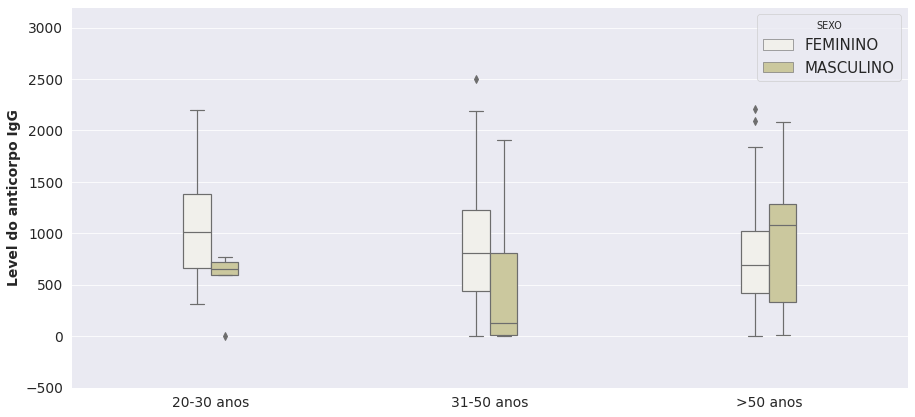

In [27]:
# Utilizando intervalo interquartílico (IQR) para retirada de outliers dos dados
Q1 = dataframe.LEITURA.quantile(0.25)
Q3 = dataframe.LEITURA.quantile(0.75)
IQR = Q3 - Q1

# Filtrando dataframe apenas para os preços dentro do intervalor interquartílico
dataframe = dataframe.query('(@Q1 - 1.5 * @IQR) <= LEITURA <= (@Q3 + 1.5 * @IQR)')

# Box plot propriamente dito
ax = sns.boxplot(x = 'IDADE_CLASSE', 
                 y = 'LEITURA',
                 hue = 'SEXO',
                 data = dataframe, 
                 color = '#d3ce97',
                 dodge = True,
                 order = ['20-30 anos', '31-50 anos', '>50 anos'],
                 width = 0.2)

# Retira legenda do eixo x
ax.set(xlabel = '')

# Ajusta legenda do eixo y
ax.set_ylabel( ylabel= 'Level do anticorpo IgG', weight = 'bold')

# Limite do ylabel
ax.set_ylim(-500,3200)

# Adicionando borda preta
ax.patch.set_edgecolor('black')  
ax.patch.set_linewidth('1')  
#plt.savefig('jaum1.pdf', format = 'pdf', dpi = 300, trnasparent = True, bbox_inches = 'tight')